<b>Modules</b>

In [156]:
# Import the Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<b>Important Function</b>

In [106]:
# Define the Function for Removal the Oulier
def removal_outliers(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers in the column
        dataset_without_outliers = data.loc[(data[column] <= upper_bound) & (data[column] >= lower_bound)]
        
        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if len(outliers) > 0:
            print(f"Outliers in column '{column}':")
            print(outliers[column].head())  # Show some of the outliers
        else:
            print(f"No outliers found in column '{column}'")
    
    return dataset_without_outliers

In [161]:
# Define the Function for Evaluation Metrices for ML Model
def classfication_metrices(y_test , predict_data):

    # Calculate the Accuracy Score
    acc = round(accuracy_score(y_test,predict_data),2)
   
    # Calculate the F1 Score
    f1 = round(f1_score(y_test , predict_data),2)
    
    # Calculate the Precision Score
    precision = round(precision_score(y_test,predict_data),2)

    # Calculate the Recall Score
    recall = round(recall_score(y_test,predict_data),2)

    # Return the All  Classification Matrices Results
    return acc , f1 , precision , recall

In [163]:
# Define the Function for Displaying the All Metrices Results
def display_metrices_res(acc , f1 , precision , recall , model_name ):

    # Display the Accuracy Score of the Logistic Regression
    print(f"\n\nAccuracy Score of {model_name} Classifier:")
    print("===========================================\n")

    print(f"Loan Status Accuracy Score : {acc}")

    # Display the F1 Score of the Logistic Regression
    print(f"\n\nF1 Score of {model_name} Classifier:")
    print("===========================================\n")

    print(f"Loan Status F1 Score : {f1}")

    # Display the Precission Score of the Logistic Regression
    print(f"\n\nPrecision Score of {model_name} Classifier:")
    print("===========================================\n")

    print(f"Loan Status Precision Score : {precision}")

    # Display the Recall Score of the Logistic Regression
    print(f"\n\nRecall Score of {model_name} Classifier:")
    print("===========================================\n")

    print(f"Loan Status Recall Score : {recall}")

In [171]:
# Define the Function for Calculating and Displaying the Confusion Matrix
def confusion_matrixs(y_test , predict_data):

    # Claculate the Confusion Matrix for the Depression Class
    conf_mat = confusion_matrix(y_test , predict_data)

    # Plot these Confusion Matrix with the help of Season Module
    #fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    plt.figure(figsize = (12 ,4 ))
    # Plot the Confusion Matrix for the Depression Class
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Depression Class')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

<b>Information about Dataset</b>

In [107]:
# Read the Dataset 
dataset = pd.read_csv("loan_data.csv")

# Display the Data from the Dataset
dataset.sample(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
34492,27.0,male,Associate,81182.0,3,RENT,8040.0,VENTURE,13.12,0.10,8.0,645,No,0
11295,22.0,female,Bachelor,88642.0,0,MORTGAGE,5000.0,MEDICAL,7.49,0.06,2.0,519,Yes,0


In [108]:
# Display the Shape of the Dataset
print(f"Here is the Shape of the Dataset : {dataset.shape}")

Here is the Shape of the Dataset : (45000, 14)


In [109]:
# Check the Missing Values in the Dataset
missingValues = dataset.isnull().sum()

# Display the Missing Values of Each Colm
print(f"Here is the Missing Values of Each Colm :\n{missingValues}")

Here is the Missing Values of Each Colm :
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [110]:
# Check the Total Duplicated Data
duplicatedData = dataset.duplicated().sum()

# Display the Total Duplicated Data
print(f"Here is the total Duplicated Data in the Dataset : {duplicatedData}")

Here is the total Duplicated Data in the Dataset : 0


<b>Unique Values of Each Categorical Colm</b>

In [111]:
# Display the Colm of Person Gender
personGender = dataset["person_gender"].unique()
print(f"Here is the Unique Data of Person Gender : {personGender}")

Here is the Unique Data of Person Gender : ['female' 'male']


In [112]:
# Display the Colm of Person Education
personEducation = dataset["person_education"].unique()
print(f"Here is the Unique Data of Person Education : {personEducation}")

Here is the Unique Data of Person Education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [113]:
# Display the Colm of Person Home OwnerShip
personHomeOwner = dataset["person_home_ownership"].unique()
print(f"Here is the Unique Data of Person Home OwnerShip : {personHomeOwner}")

Here is the Unique Data of Person Home OwnerShip : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [114]:
# Display the Colm of Person Loan Interest
personLoanInt = dataset["loan_intent"].unique()
print(f"Here is the Unique Data of Person Loan Interest : {personLoanInt}")

Here is the Unique Data of Person Loan Interest : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [115]:
# Display the Colm of Person Previous Loan
personPreviousLoan = dataset["previous_loan_defaults_on_file"].unique()
print(f"Here is the Unique Data of Person Previous Loan : {personPreviousLoan}")

Here is the Unique Data of Person Previous Loan : ['No' 'Yes']


<b>Visualization</b>

In [193]:
# Define the stype of Figure
sns.set(style="whitegrid")

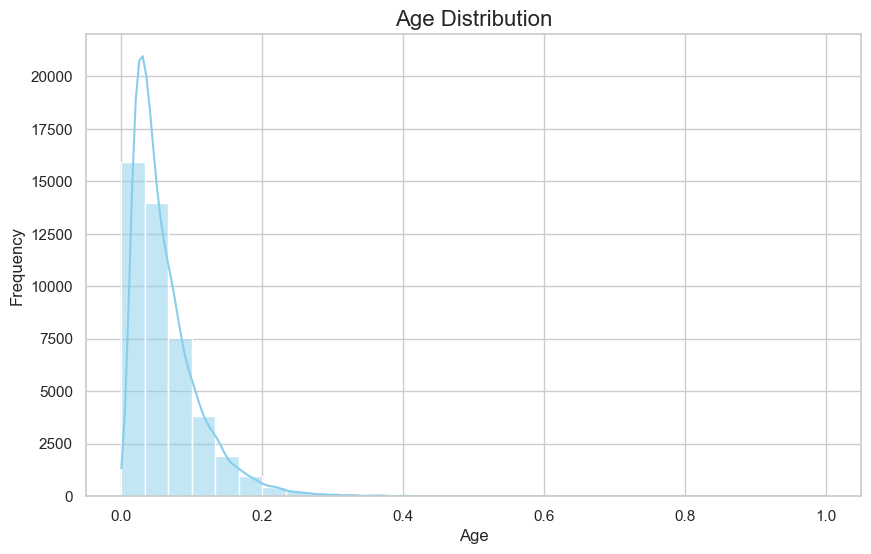

In [194]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(dataset['person_age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


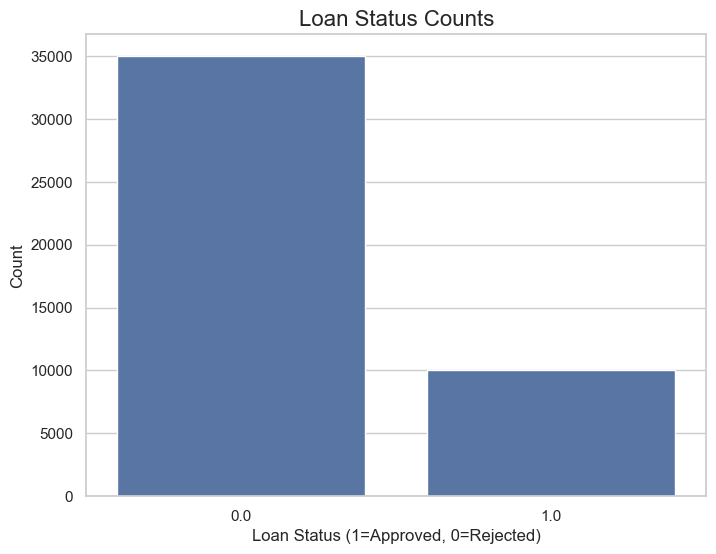

In [196]:
# 2. Loan Status Counts
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='loan_status')
plt.title("Loan Status Counts", fontsize=16)
plt.xlabel("Loan Status (1=Approved, 0=Rejected)")
plt.ylabel("Count")
plt.show()

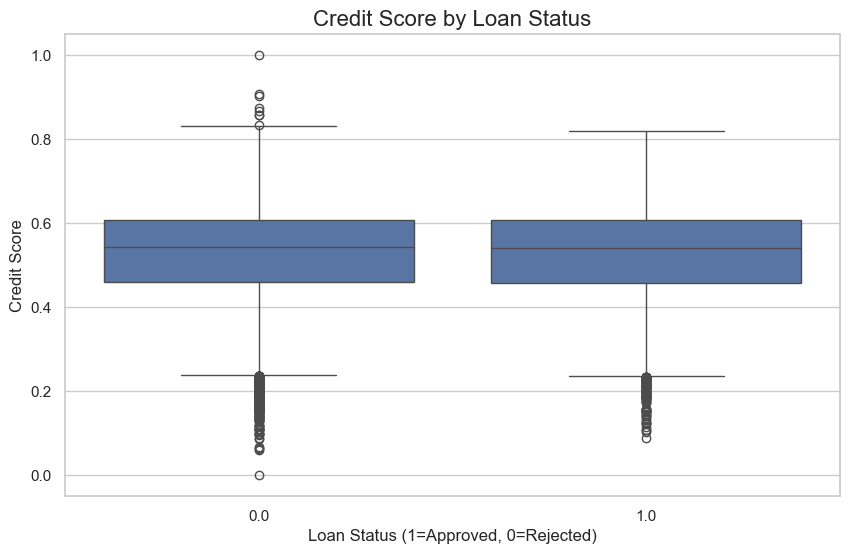

In [198]:
# 3. Credit Score vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='loan_status', y='credit_score')
plt.title("Credit Score by Loan Status", fontsize=16)
plt.xlabel("Loan Status (1=Approved, 0=Rejected)")
plt.ylabel("Credit Score")
plt.show()

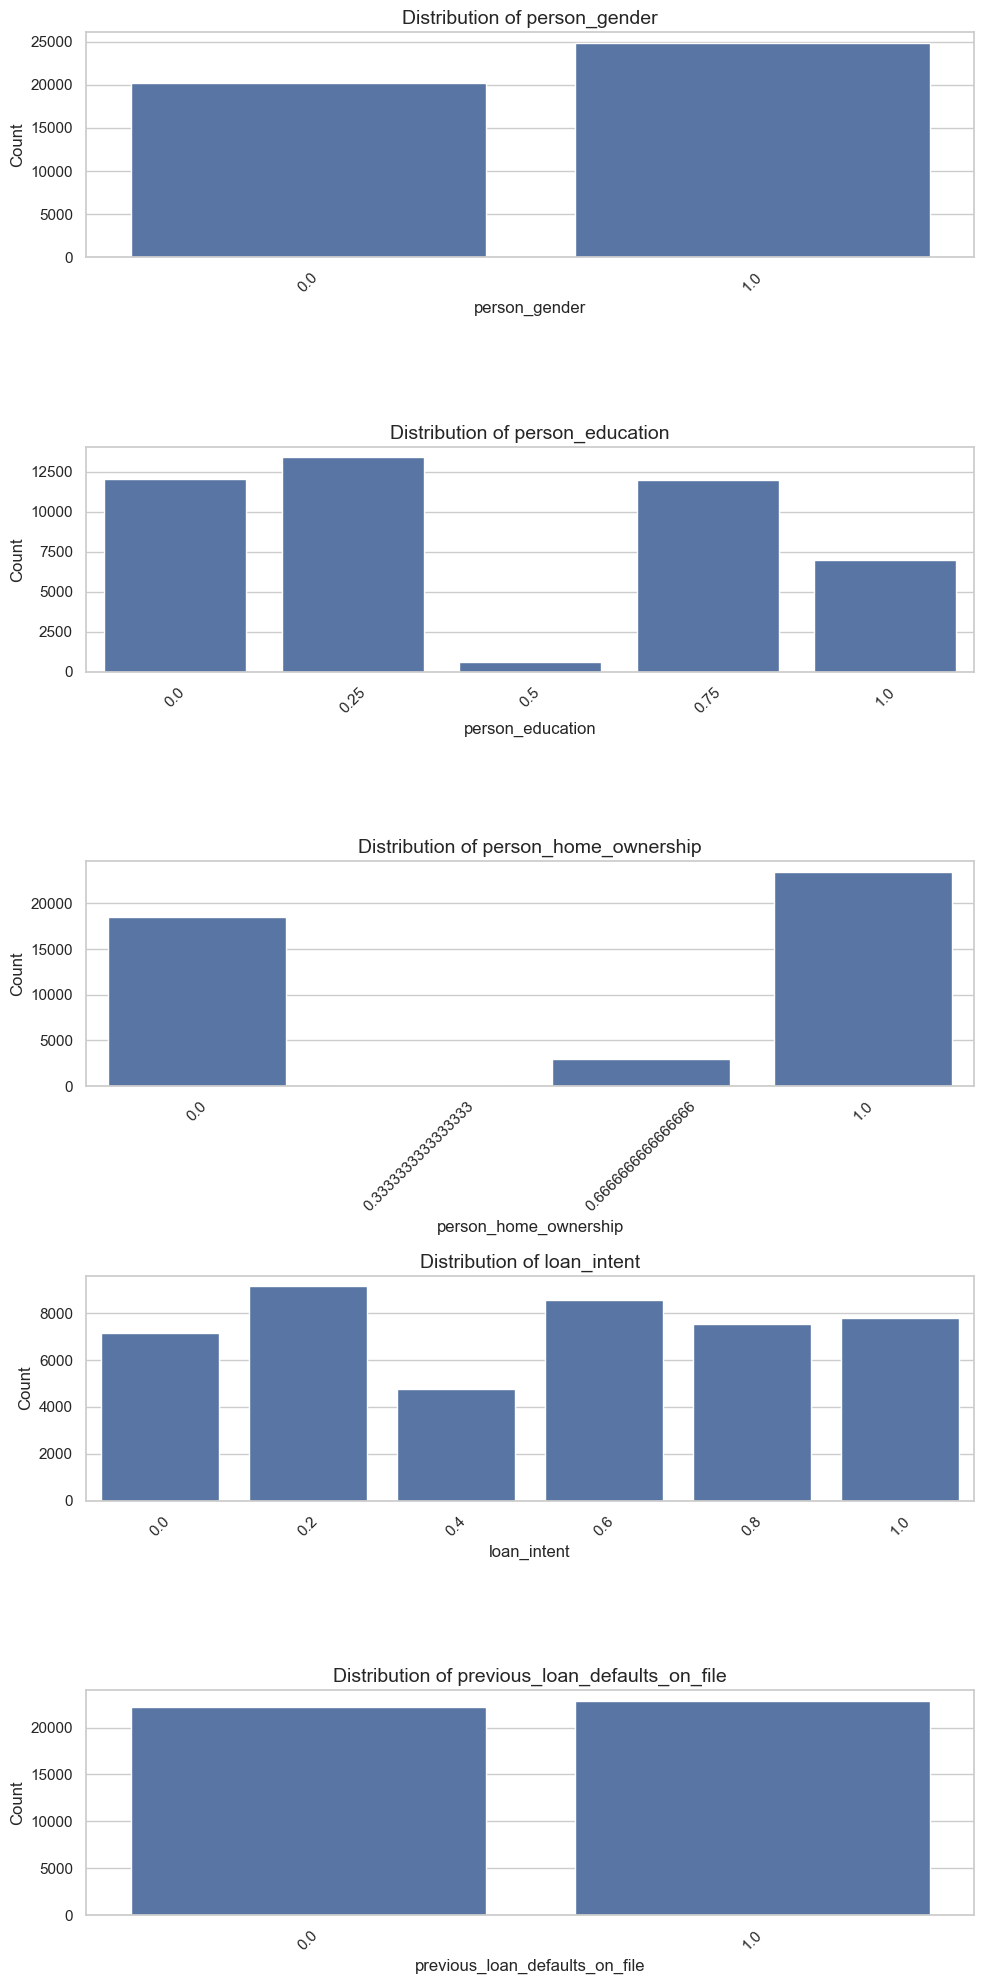

In [202]:
# List of categorical columns to plot
categorical_columns = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file"
]

# Create count plots for each categorical column
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))

for ax, column in zip(axes, categorical_columns):
    sns.countplot(data=dataset, x=column, ax=ax)
    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<b>Dataset Pre-processing</b>

In [117]:
# Now Handle the Categorical Data 
encoder = LabelEncoder() # Create the Object fro the LabelEncoder

# Define the Catgeorical Column Name
categoricalColm = ["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]

# Apply the LabelEnocder in the Categorical Colm
for col in categoricalColm:
    dataset[col] = encoder.fit_transform(dataset[col]) 

In [118]:
# Normalize the Data into [0,1]
for column in dataset.columns:
    min_value = dataset[column].min()
    max_value = dataset[column].max()
    
    # Apply Min-Max normalization formula
    dataset[column] = (dataset[column] - min_value) / (max_value - min_value)

<b>Identitfing Best Feature</b>

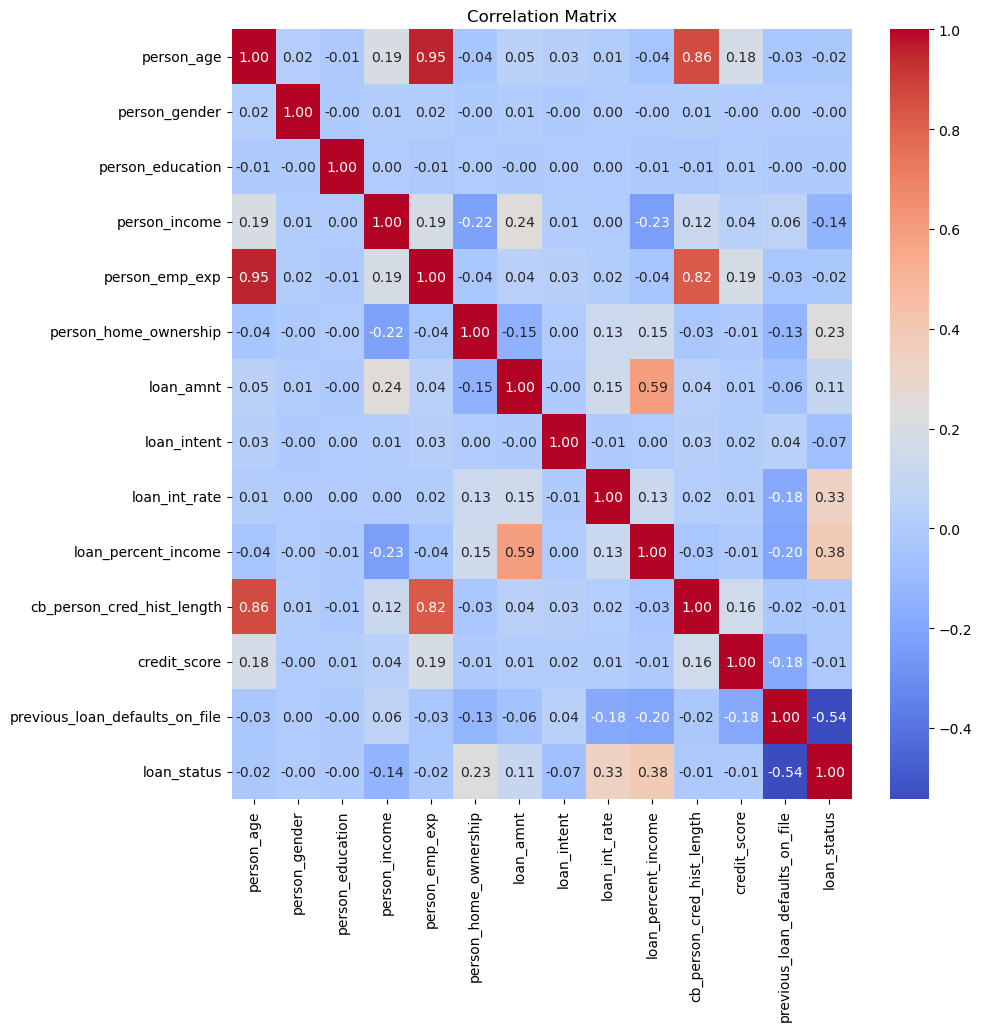

In [119]:
# Find out the Correlation of Each Colm using Corr Method
corrMatrix = dataset.corr()

# Display the Correlation Matrix using HeatMap 
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [120]:
# Exclude the Correlated Colms
threshold = 0.7  # Define the Threshold 
corrFeatures = []

# get the Correlated Features
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) >= threshold:
            colname = corrMatrix.columns[i]
            corrFeatures.append(colname)

In [121]:
# Display the Correlated Columms
print(f"Here is the Correlated Columns : {corrFeatures}")

Here is the Correlated Columns : ['person_emp_exp', 'cb_person_cred_hist_length', 'cb_person_cred_hist_length']


In [122]:
# Now Drop the These Features
dataset.drop(corrFeatures , inplace = True , axis = 1)

<b>Identifying Outliers from Dataset</b>

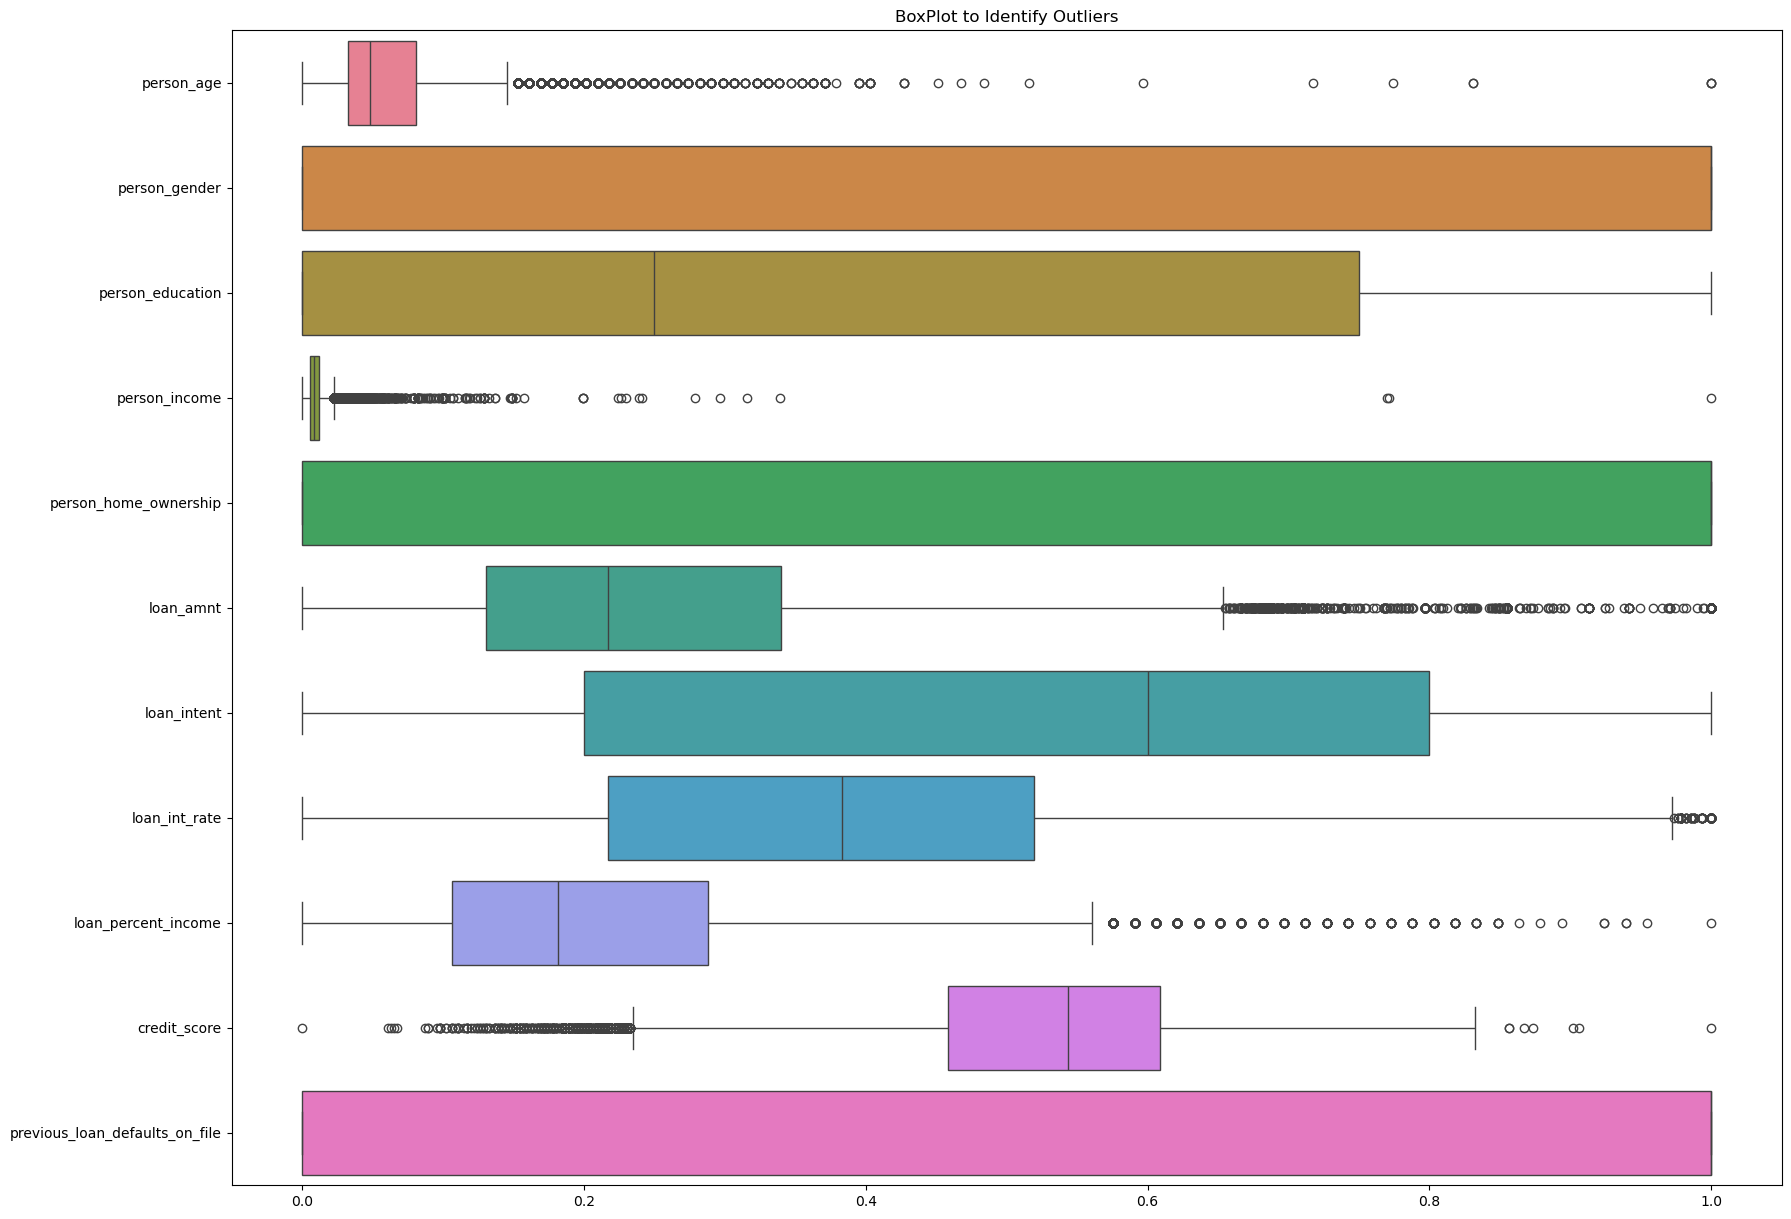

In [123]:
# Create a BoxPlot
plt.figure(figsize=(20, 15))  
sns.boxplot(data=dataset.iloc[:,:-1], orient='h')  # Horizontal BoxPlot to show all columns
plt.title("BoxPlot to Identify Outliers")
plt.show()

In [124]:
# Now, Identitying Outliers in the Dataset
#newDataset = removal_outliers(dataset)

In [125]:
# # Display the Shape of After Removal of Outliers
# print(f"Here is the Shape of the Actual Dataset : {dataset.shape}")
# print(f"Here is the Shape of the NewDataset : {newDataset.shape}")

<b>Dataset Balance\Imbalance</b>

In [126]:
# Check the Dataset is Balance or Not
eachClassCount = dataset["loan_status"].value_counts()

# Display the Count of Each Class
print(f"Here is the Count of Each Class :\n{eachClassCount}")

Here is the Count of Each Class :
loan_status
0.0    35000
1.0    10000
Name: count, dtype: int64


In [147]:
# Balance the Datase
countClassZero , countClassOne = dataset["loan_status"].value_counts()[0] , dataset["loan_status"].value_counts()[1]

# Get the Each Class Data
datasetClassZero , datasetClassOne = dataset[dataset["loan_status"] == 0] ,  dataset[dataset["loan_status"] == 1]

# Now Balance the Dataset (Reduce the ClassZero Data)
newDatasetClassZero = datasetClassZero.sample(n = countClassOne , random_state = 42)

# Concat the all Class Data
newDataset = pd.concat([newDatasetClassZero , datasetClassOne])

In [148]:
# Display the Shape of the New Dataset
print(f"Here is the Shape of the New Dataset : {newDataset.shape}")

Here is the Shape of the New Dataset : (20000, 12)


In [150]:
# Check the Count of Each Class
newDataset["loan_status"].value_counts()

loan_status
0.0    10000
1.0    10000
Name: count, dtype: int64

<b>Split the Dataset into Training & Testing </b>

In [151]:
# Split the Dataset into Independent & Dependent Matrix
X = newDataset.iloc[:,:-1].values
y = newDataset.iloc[:,-2].values

# Dsiplay the Shapes of the X & y Matrix
print(f"Here is the Shape of X Matrix : {X.shape}")
print(f"Here is the Shape of Y Matrix : {y.shape}")

Here is the Shape of X Matrix : (20000, 11)
Here is the Shape of Y Matrix : (20000,)


In [155]:
# Split the Dataset into Training and Testing 
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.15 , random_state = 42)

# Dsiplay the Shape 
print(f"Here is the Shape of X Train : {x_train.shape}")
print(f"Here is the Shape of Y Train : {y_train.shape}")
print(f"Here is the Shape of X Test  : {x_test.shape}")
print(f"Here is the Shape of Y Test  : {y_test.shape}")

Here is the Shape of X Train : (17000, 11)
Here is the Shape of Y Train : (17000,)
Here is the Shape of X Test  : (3000, 11)
Here is the Shape of Y Test  : (3000,)


<b>Machine Learning Models</b>

Logistic Regression

In [183]:
# Create the Object of LogisticRegression Model
logistic_regression = LogisticRegression()

# Train the Model in the Training Dataset
log_reg = logistic_regression.fit(x_train, y_train)

In [184]:
# Predict the Results with the Test Dataset
log_reg_predict = log_reg.predict(x_test)

# Calculate the Accuracy, Precision, Recall, F1 Score
lgacc , f1 , precision , recall = classfication_metrices(y_test , log_reg_predict)

# Display the All Evaluation Results
display_metrices_res(lgacc , f1 , precision , recall , "Logistic Regression")



Accuracy Score of Logistic Regression Classifier:

Loan Status Accuracy Score : 1.0


F1 Score of Logistic Regression Classifier:

Loan Status F1 Score : 1.0


Precision Score of Logistic Regression Classifier:

Loan Status Precision Score : 1.0


Recall Score of Logistic Regression Classifier:

Loan Status Recall Score : 1.0


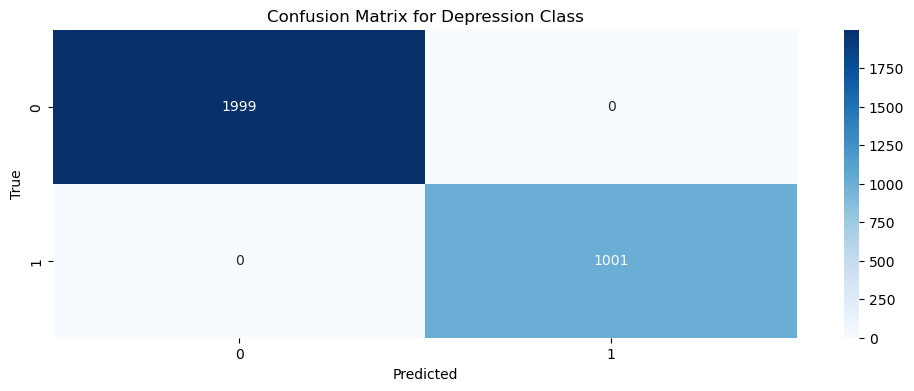

In [185]:
# Display the Confusion Matrix of the Logistic Regression Model
confusion_matrixs(y_test , log_reg_predict)

Random Forest Classifier

In [186]:
# Create the Object of the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=5, random_state=0)

# Train the Model in the Training Dataset
rand_fst = random_forest.fit(x_train, y_train)

In [187]:
# Predict the Results with the Test Dataset
rand_fst_predict = rand_fst.predict(x_test)

# Call the classification Matrices Function for the Evalution of Random Forest Model
facc , f1 , precision , recall = classfication_metrices(y_test , rand_fst_predict)

# Display the Metrices Results of the Random Forest Model
display_metrices_res(facc , f1 , precision , recall , "Random Forest")



Accuracy Score of Random Forest Classifier:

Loan Status Accuracy Score : 1.0


F1 Score of Random Forest Classifier:

Loan Status F1 Score : 1.0


Precision Score of Random Forest Classifier:

Loan Status Precision Score : 1.0


Recall Score of Random Forest Classifier:

Loan Status Recall Score : 1.0


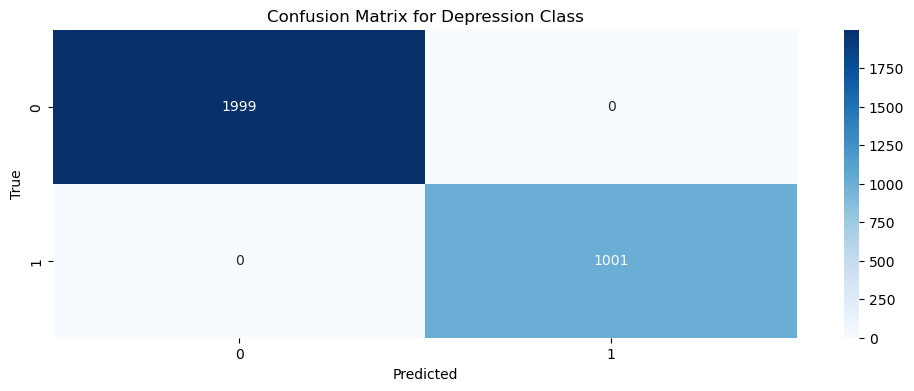

In [188]:
# Display the Confusion Matrix of the Random Forest Model
confusion_matrixs(y_test , rand_fst_predict)

Linear Support Vector Classifier

In [189]:
# Create the Object of the Support Vector Machine Classifier
linear_svc = LinearSVC()

# Train the Model in the Training Dataset
l_svm = linear_svc.fit(x_train, y_train)

In [190]:
# Predict the Results with the Test Dataset
l_svm_predict = l_svm.predict(x_test)

# Call the classification Matrices Function for the Evalution of Support Vector Model
lacc , f1 , precision , recall = classfication_metrices(y_test , l_svm_predict)

# Display the Metrices Results of the Support Vector Model
display_metrices_res(lacc , f1 , precision , recall , "Support Vector")



Accuracy Score of Support Vector Classifier:

Loan Status Accuracy Score : 1.0


F1 Score of Support Vector Classifier:

Loan Status F1 Score : 1.0


Precision Score of Support Vector Classifier:

Loan Status Precision Score : 1.0


Recall Score of Support Vector Classifier:

Loan Status Recall Score : 1.0


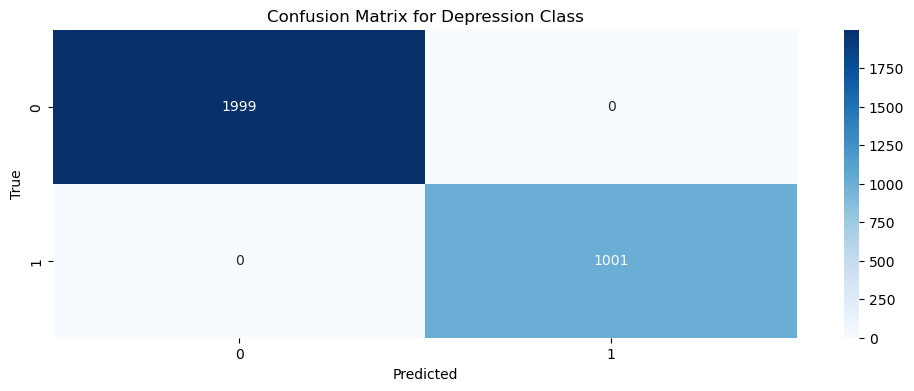

In [191]:
# Display the Confusion Matrix of the Support Vector Machine Model
confusion_matrixs(y_test , l_svm_predict)

<b>Evaluate Metricd For ML Models</b>

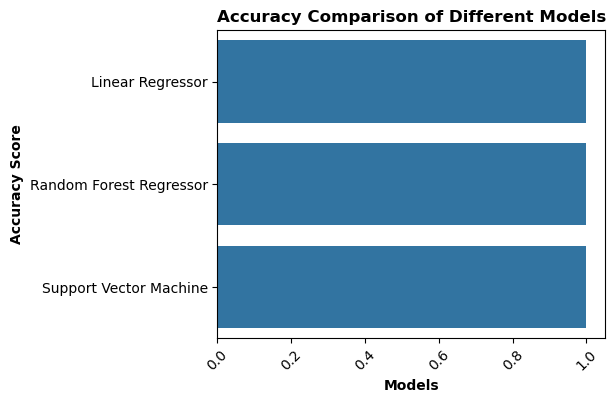

In [192]:
# Define the Models Name
modelName = ["Linear Regressor", "Random Forest Regressor", "Support Vector Machine"]

# Define the Accuracy Score of Each Model
accScores = [ lgacc , facc  , lacc]

# Create a DataFrame for Visualization
data = pd.DataFrame({
    'Model': modelName,
    'Accuracy': accScores
})

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.barplot(y='Model', x='Accuracy', data=data)
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy Score', fontweight='bold')
plt.title('Accuracy Comparison of Different Models', fontweight='bold')
plt.xticks(rotation=45)
plt.show()